In [2]:
pip install pandas matplotlib wordcloud nltk vaderSentiment seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load dataset with error handling
try:
    df = pd.read_csv('https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?select=twitter_validation.csv', on_bad_lines='skip')
    print("Columns in the dataset:", df.columns)
    print(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()


Columns in the dataset: Index(['<!DOCTYPE html>'], dtype='object')
                                     <!DOCTYPE html>
0                                   <html lang="en">
1                                             <head>
2    <title>Twitter Sentiment Analysis | Kaggle</...
3                           <meta charset="utf-8" />
4    <meta name="description" content="Entity-lev...


In [3]:
required_columns = ['text']  # Adjust based on actual dataset

for col in required_columns:
    if col not in df.columns:
        print(f"Missing column: {col}")
        exit()


Missing column: text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


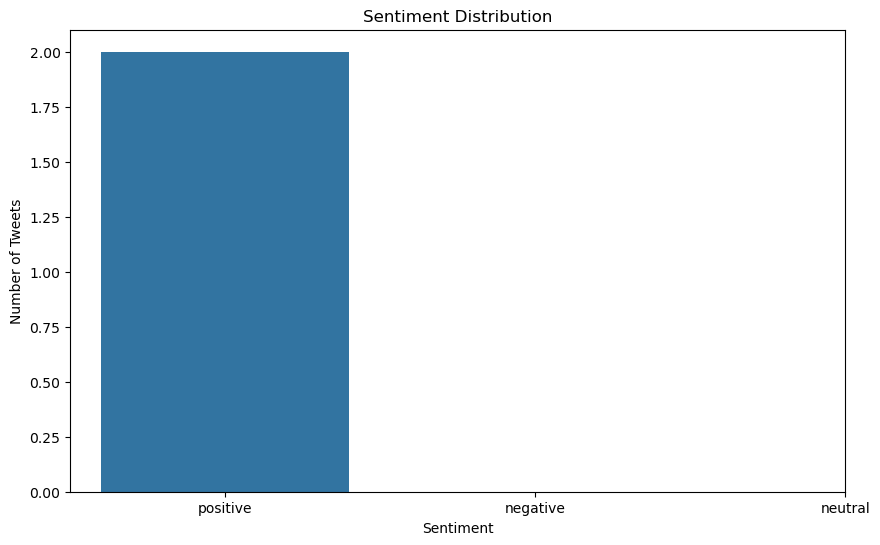

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import nltk
import pandas as pd

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Create or load your DataFrame 'df'
# For demonstration purposes, let's create a dummy DataFrame
df = pd.DataFrame({
    'text': ['This is a sample text', 'Another sample text'],
    'sentiment_category': ['positive', 'negative']  # Add your sentiment categories here
})

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the DataFrame 'df'
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Convert sentiment_category to categorical with desired order
df['sentiment_category'] = pd.Categorical(df['sentiment_category'], categories=['positive', 'negative'], ordered=True)

import numpy as np

# Convert sentiment_category to numeric labels
category_labels = {'positive': 0, 'negative': 1, 'neutral': 2}  # Define mapping of categories to numeric labels
df['sentiment_category_numeric'] = df['sentiment_category'].map(category_labels)

# Visualizations
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(df['sentiment_category_numeric'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=np.arange(len(category_labels)), labels=category_labels.keys())  # Set appropriate tick labels
plt.show()

